In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.datasets import *
from matplotlib import colors
color_arr = colors.ListedColormap(["#FFA225", "#3BA2FF"])  #, "#DCDCDC"])
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sklearn.datasets.__all__

['clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_species_distributions',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_rcv1',
 'fetch_kddcup99',
 'fetch_openml',
 'get_data_home',
 'load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_breast_cancer',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_circles',
 'make_classification',
 'make_checkerboard',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

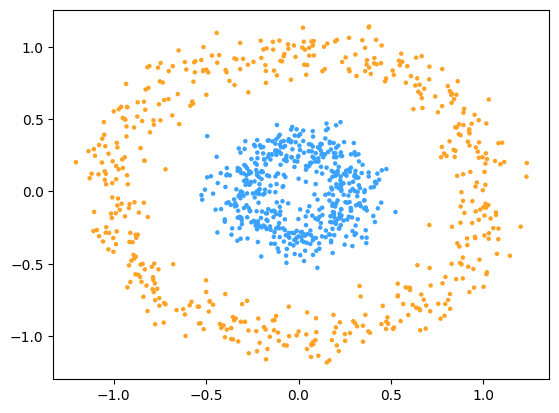

In [6]:
yq_data, yq_target = make_circles(n_samples=1000, noise=0.1, factor=0.3)

plt.scatter(yq_data[:, 0], yq_data[:, 1], s=5, c=yq_target, cmap=color_arr)
plt.draw()

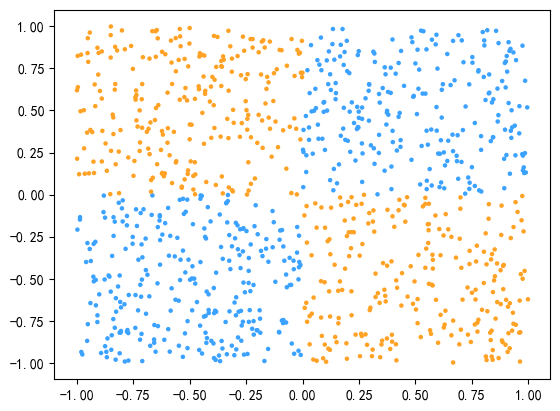

In [10]:
sf_data = 2 * np.random.rand(1000, 2) - 1
sf_target = (sf_data[:, 0] * sf_data[:, 1] > 0) * 1
plt.scatter(sf_data[:, 0], sf_data[:, 1], s=5, c=sf_target, cmap=color_arr)
plt.draw()

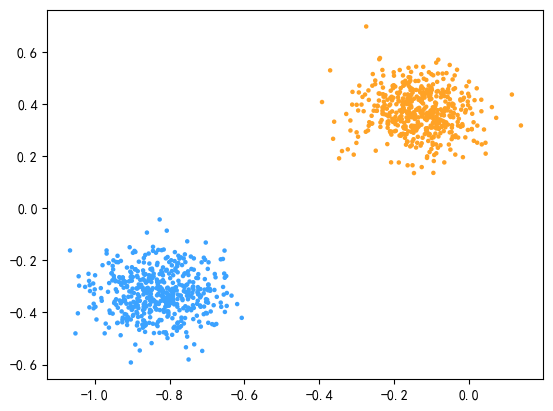

In [42]:
# 对角
dj_data, dj_target = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=1)
dj_data = dj_data / 12
plt.scatter(dj_data[:, 0], dj_data[:, 1], s=5, c=dj_target, cmap=color_arr)
plt.draw()

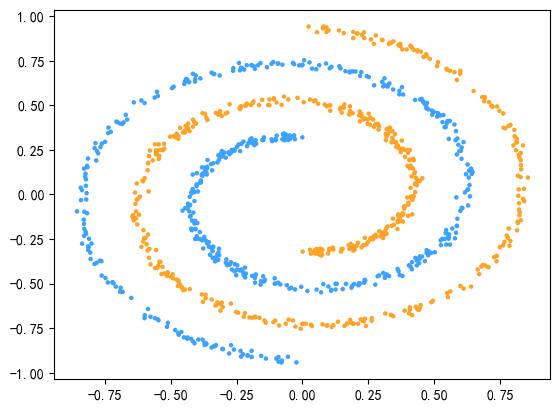

In [131]:
# 螺旋
lx_data, lx_target = make_swiss_roll(n_samples=500, random_state=0, noise=0.2)
lx_data[:, 1] = lx_data[:, 2]
lx_data[:, 2] = 1
lx_data_2 = lx_data.copy()
lx_data_2[:, 0] = -lx_data[:, 0]
lx_data_2[:, 1] = -lx_data[:, 1]
lx_data[:, 2] = 0
lx_data = np.row_stack([lx_data, lx_data_2])
lx_target = lx_data[:, 2]
lx_data = lx_data[:, :2] / 15
plt.scatter(lx_data[:, 0], lx_data[:, 1], s=5, c=lx_target, cmap=color_arr)
plt.draw()

In [31]:
import torch
from torch import nn
from torch.nn import Module
import torch.nn.functional as F

class MLP_6642(Module):
    def __init__(self):
        super(MLP_6642, self).__init__()
        self.l1 = nn.Linear(7, 6)
        self.l2 = nn.Linear(6, 6)
        self.l3 = nn.Linear(6, 4)
        self.l4 = nn.Linear(4, 2)
    def forward(self, input):
        x = F.relu(self.l1(input))
        x = F.dropout(F.relu(self.l2(x)), p=0.2)
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return F.softmax(x, dim=1)

model = MLP_6642()
model

MLP_6642(
  (l1): Linear(in_features=7, out_features=6, bias=True)
  (l2): Linear(in_features=6, out_features=6, bias=True)
  (l3): Linear(in_features=6, out_features=4, bias=True)
  (l4): Linear(in_features=4, out_features=2, bias=True)
)

In [19]:
import math
from torch import tensor

def fill_7(data):
    data_x_pd = pd.DataFrame(data, columns=['x1', 'x2'])
    data_x_pd['x1^2'] = data_x_pd['x1'] * data_x_pd['x1']
    data_x_pd['x2^2'] = data_x_pd['x2'] * data_x_pd['x2']
    data_x_pd['x1x2'] = data_x_pd['x1'] * data_x_pd['x2']
    data_x_pd['sin(x1)'] = data_x_pd['x1'].apply(lambda a: math.sin(a))
    data_x_pd['sin(x2)'] = data_x_pd['x2'].apply(lambda a: math.sin(a))
    return tensor(data_x_pd.values, dtype=torch.float)

yq_data_7 = fill_7(yq_data)
yq_data_7

tensor([[-0.5000, -0.6143,  0.2500,  ...,  0.3072, -0.4794, -0.5764],
        [-1.0573, -0.3458,  1.1180,  ...,  0.3656, -0.8711, -0.3389],
        [ 1.0056, -0.1666,  1.0113,  ..., -0.1676,  0.8445, -0.1658],
        ...,
        [-0.5750,  0.6213,  0.3307,  ..., -0.3573, -0.5439,  0.5821],
        [ 0.3816,  1.1401,  0.1457,  ...,  0.4351,  0.3725,  0.9087],
        [ 1.0113, -0.0847,  1.0227,  ..., -0.0856,  0.8475, -0.0846]])

In [23]:
target_1 = model(fill_7(yq_data)).cpu().detach().numpy()
target_1

array([[0.4628146 , 0.5371854 ],
       [0.46412256, 0.53587747],
       [0.46304196, 0.53695804],
       ...,
       [0.46412256, 0.53587747],
       [0.46412256, 0.53587747],
       [0.4630909 , 0.53690904]], dtype=float32)

In [24]:
target_1 = (target_1[:, 0] > target_1[:, 1]) * 1
target_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

10201


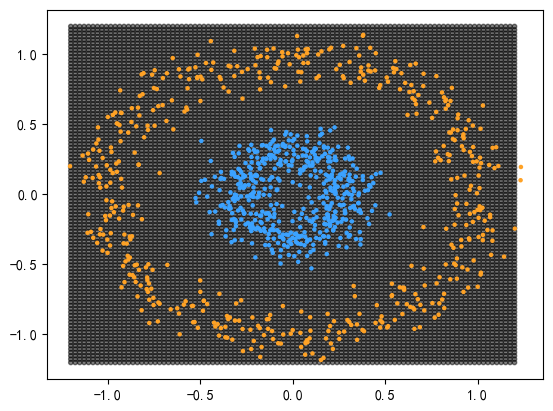

In [27]:
target_1 = model(fill_7(yq_data)).cpu().detach().numpy()
target_1 = (target_1[:, 0] > target_1[:, 1]) * 1

disp_scale = 100.0
disp_input = []
for a in range(int(disp_scale) + 1):
    for b in range(int(disp_scale) + 1):
        disp_input.append([a / disp_scale, b / disp_scale])
print(len(disp_input))
disp_np = np.array(disp_input)
disp_np = disp_np * 2.4 - 1.2
disp_tensor = tensor(disp_np, dtype=torch.float)

target_disp = model(fill_7(disp_np)).cpu().detach().numpy()
target_disp = (target_disp[:, 0] > target_disp[:, 1]) * 1

plt.scatter(disp_np[:, 0], disp_np[:, 1], s=10, c=target_disp, cmap='gray', alpha=0.5)
plt.scatter(yq_data[:, 0], yq_data[:, 1], s=5, c=yq_target, cmap=color_arr)
plt.draw()

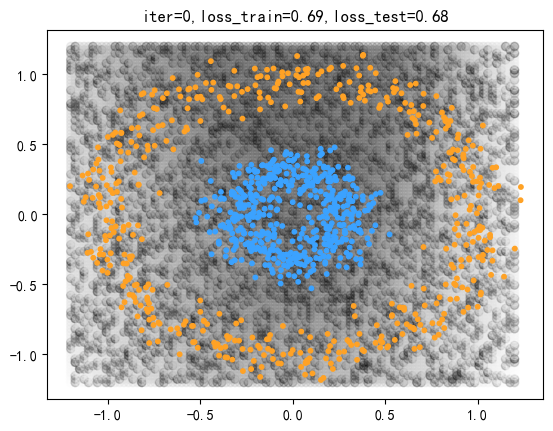

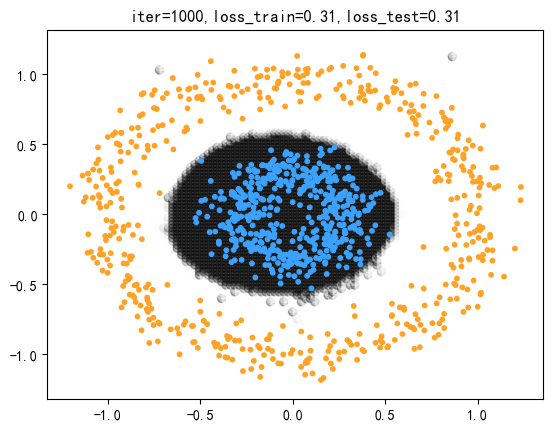

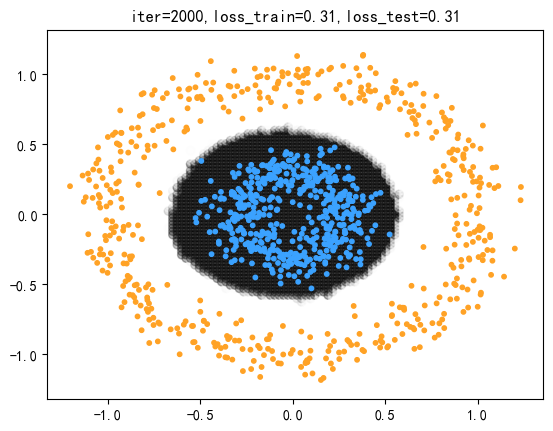

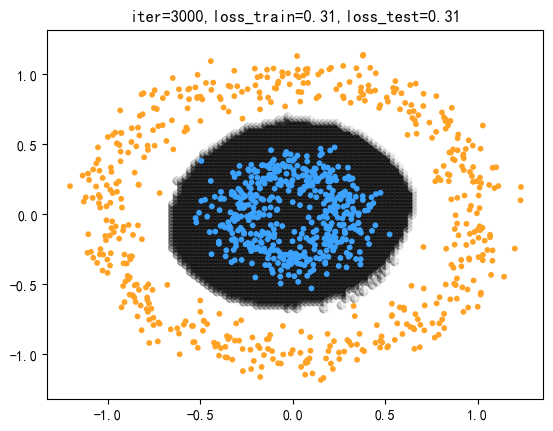

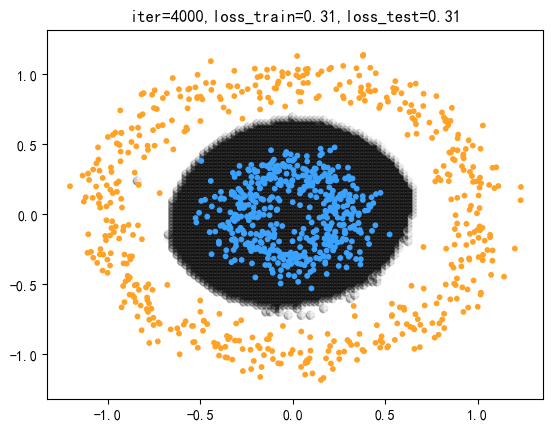

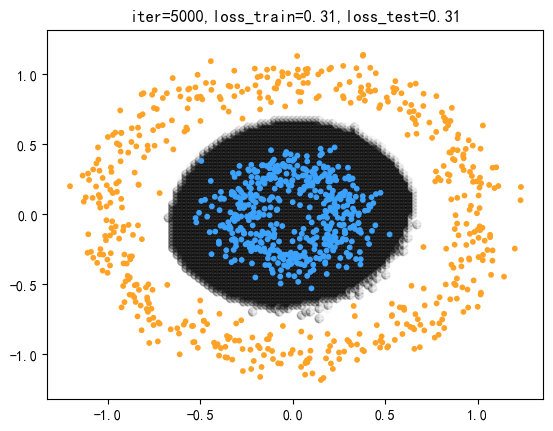

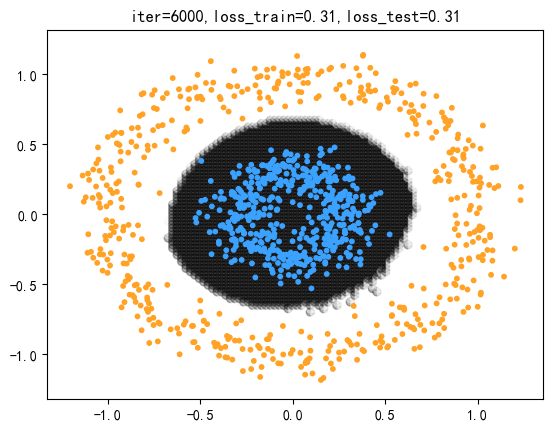

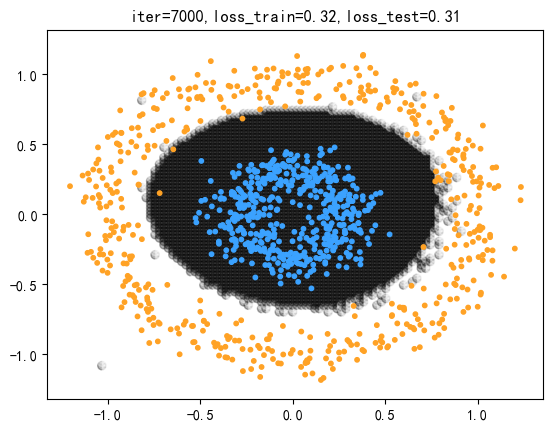

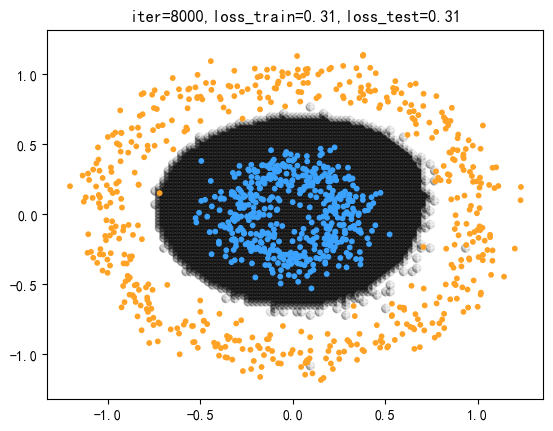

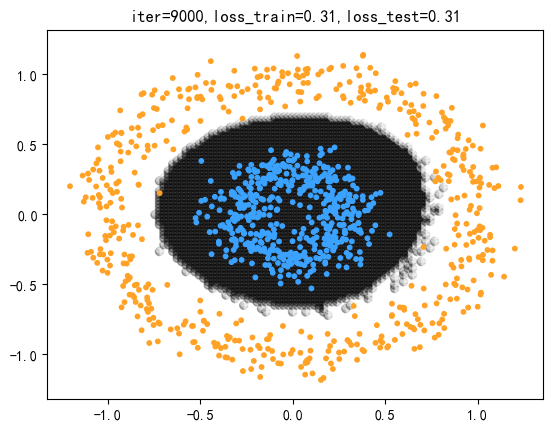

In [72]:
from torch import optim
from sklearn.model_selection import train_test_split
src_x, src_y = yq_data, yq_target
train_x, test_x, train_y, test_y = train_test_split(src_x, src_y, random_state=123, test_size=0.3)

train_x = fill_7(train_x).cuda()
train_y = tensor(train_y, dtype=torch.long).cuda()
test_x = fill_7(test_x).cuda()
test_y = torch.tensor(test_y, dtype=torch.long).cuda()
disp_input_tensor = fill_7(disp_np).cuda()

model = MLP_6642().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
for iter in range(10000):
    train_x_predict = model(train_x)
    loss_train = criterion(train_x_predict, train_y)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    if iter % 1000 == 0:
        model.eval()
        loss_test = criterion(model(test_x), test_y)
        disp_predict_tensor = model(disp_input_tensor)
        model.train()
        disp_predict_np = disp_predict_tensor.cpu().detach().numpy()
        plt.title("iter=" + str(iter)
                  + ",loss_train=" + str(loss_train.cpu().detach().numpy())[:4]
                  + ",loss_test=" + str(loss_test.cpu().detach().numpy())[:4])
        plt.scatter(disp_np[:, 0], disp_np[:, 1], c=disp_predict_np[:, 0] - disp_predict_np[:, 1], cmap='gray',
                    alpha=0.3)
        plt.scatter(src_x[:, 0], src_x[:, 1], c=src_y, s=10, cmap=color_arr)
        plt.show()


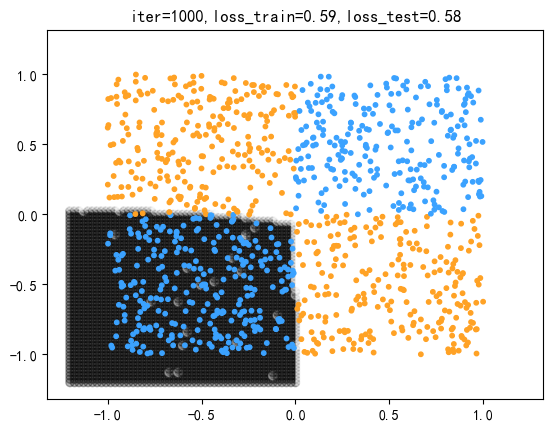

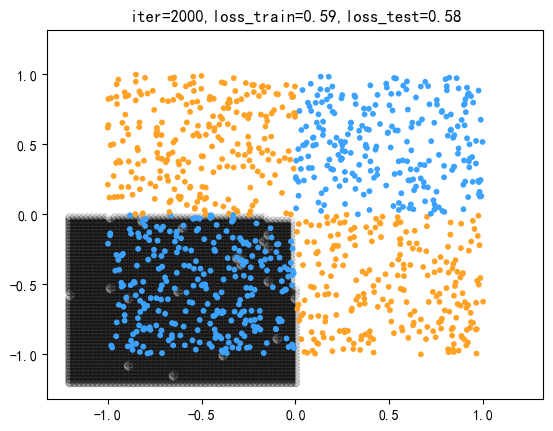

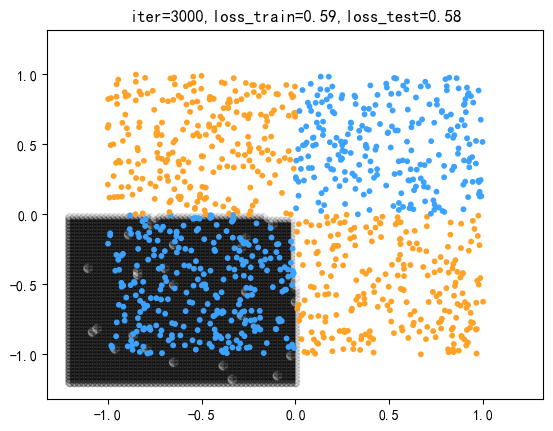

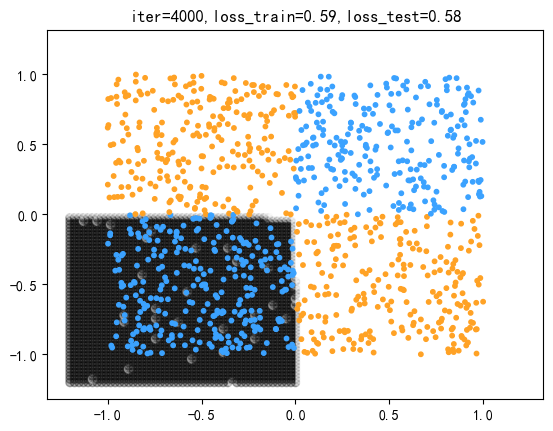

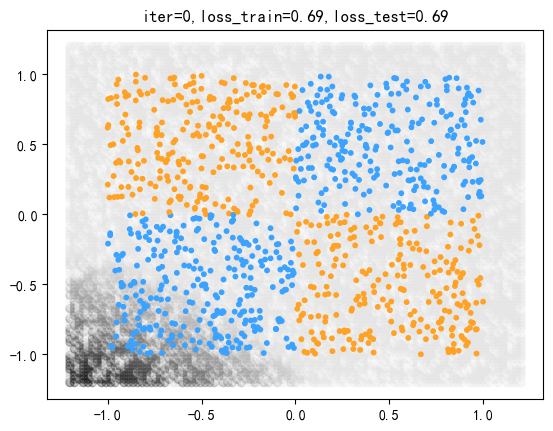

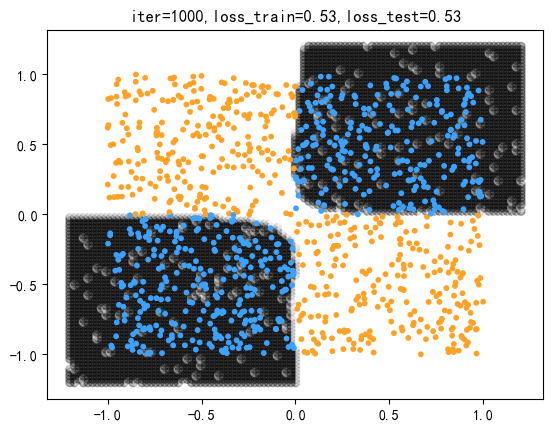

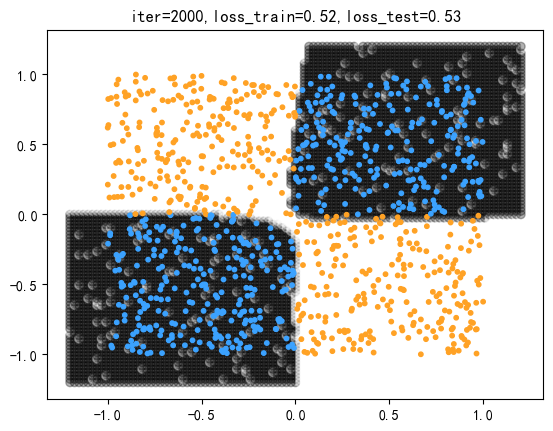

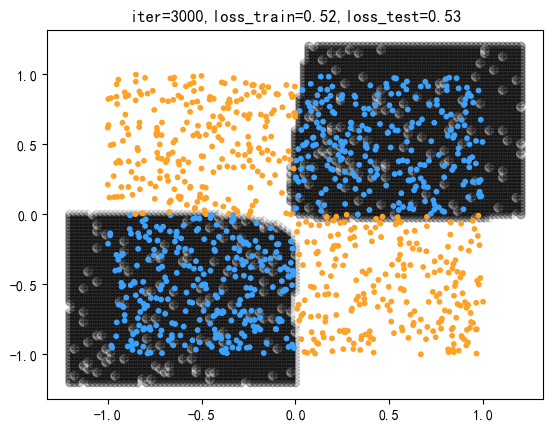

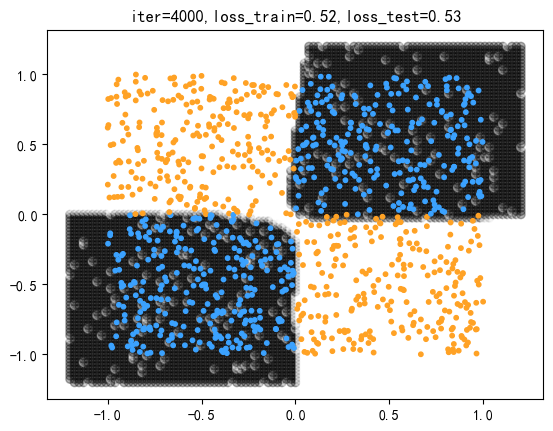

In [71]:
from torch import optim
from sklearn.model_selection import train_test_split
src_x, src_y = sf_data, sf_target
train_x, test_x, train_y, test_y = train_test_split(src_x, src_y, random_state=123, test_size=0.3)

train_x = fill_7(train_x).cuda()
train_y = tensor(train_y, dtype=torch.long).cuda()
test_x = fill_7(test_x).cuda()
test_y = torch.tensor(test_y, dtype=torch.long).cuda()
disp_input_tensor = fill_7(disp_np).cuda()

model = MLP_6642().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
for iter in range(5000):
    train_x_predict = model(train_x)
    loss_train = criterion(train_x_predict, train_y)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    if iter % 1000 == 0:
        model.eval()
        loss_test = criterion(model(test_x), test_y)
        disp_predict_tensor = model(disp_input_tensor)
        model.train()
        disp_predict_np = disp_predict_tensor.cpu().detach().numpy()
        plt.title("iter=" + str(iter)
                  + ",loss_train=" + str(loss_train.cpu().detach().numpy())[:4]
                  + ",loss_test=" + str(loss_test.cpu().detach().numpy())[:4])
        plt.scatter(disp_np[:, 0], disp_np[:, 1], c=disp_predict_np[:, 0] - disp_predict_np[:, 1], cmap='gray',
                    alpha=0.3)
        plt.scatter(src_x[:, 0], src_x[:, 1], c=src_y, s=10, cmap=color_arr)
        plt.show()


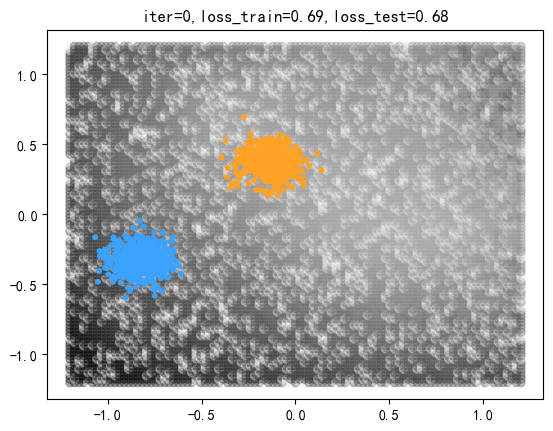

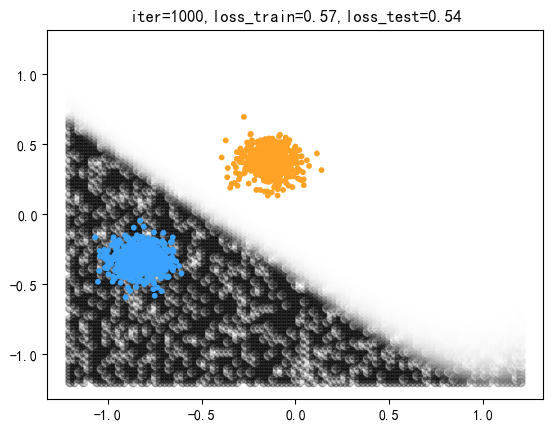

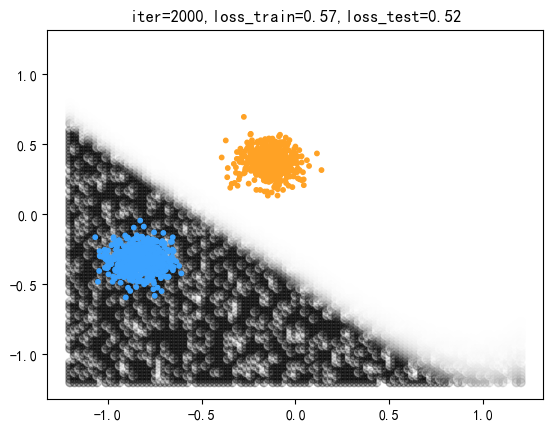

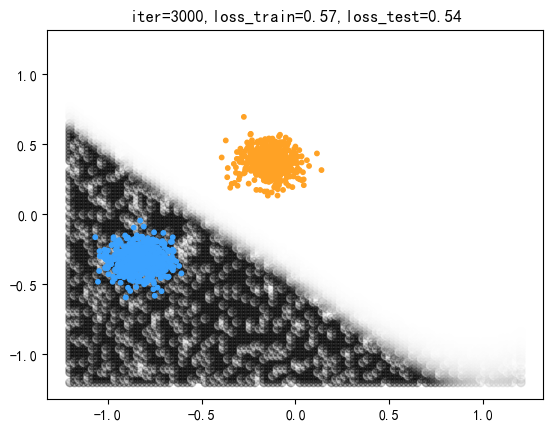

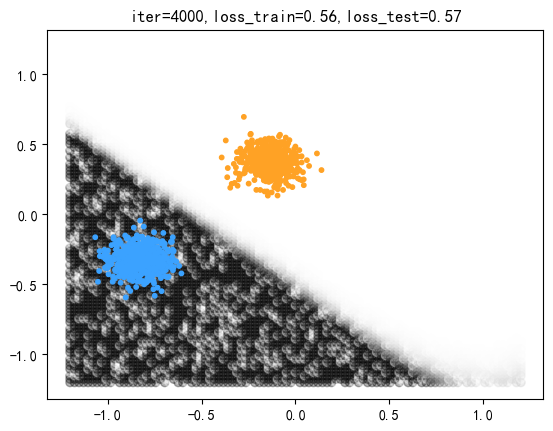

In [68]:
from torch import optim
from sklearn.model_selection import train_test_split
src_x, src_y = dj_data, dj_target
train_x, test_x, train_y, test_y = train_test_split(src_x, src_y, random_state=123, test_size=0.3)

train_x = fill_7(train_x).cuda()
train_y = tensor(train_y, dtype=torch.long).cuda()
test_x = fill_7(test_x).cuda()
test_y = torch.tensor(test_y, dtype=torch.long).cuda()
disp_input_tensor = fill_7(disp_np).cuda()

model = MLP_6642().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
for iter in range(5000):
    train_x_predict = model(train_x)
    loss_train = criterion(train_x_predict, train_y)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    if iter % 1000 == 0:
        model.eval()
        loss_test = criterion(model(test_x), test_y)
        disp_predict_tensor = model(disp_input_tensor)
        model.train()
        disp_predict_np = disp_predict_tensor.cpu().detach().numpy()
        plt.title("iter=" + str(iter)
                  + ",loss_train=" + str(loss_train.cpu().detach().numpy())[:4]
                  + ",loss_test=" + str(loss_test.cpu().detach().numpy())[:4])
        plt.scatter(disp_np[:, 0], disp_np[:, 1], c=disp_predict_np[:, 0] - disp_predict_np[:, 1], cmap='gray',
                    alpha=0.3)
        plt.scatter(src_x[:, 0], src_x[:, 1], c=src_y, s=10, cmap=color_arr)
        plt.show()


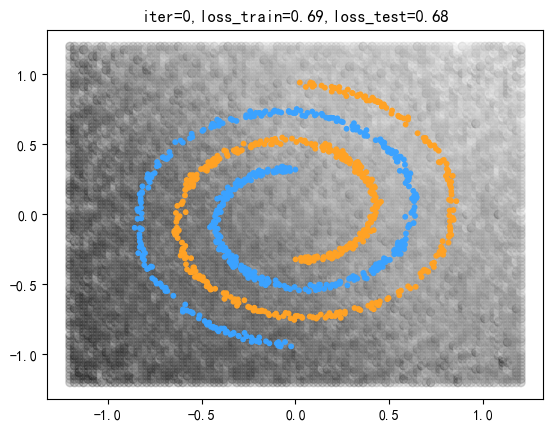

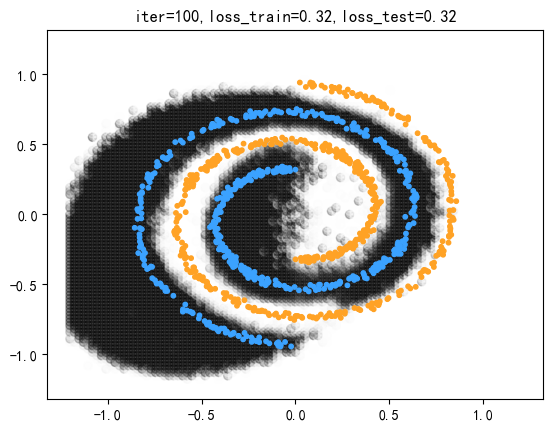

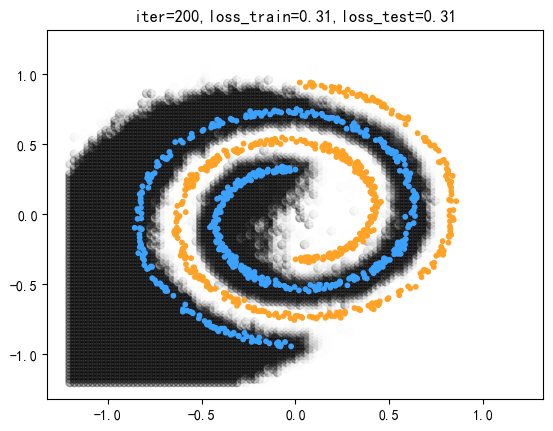

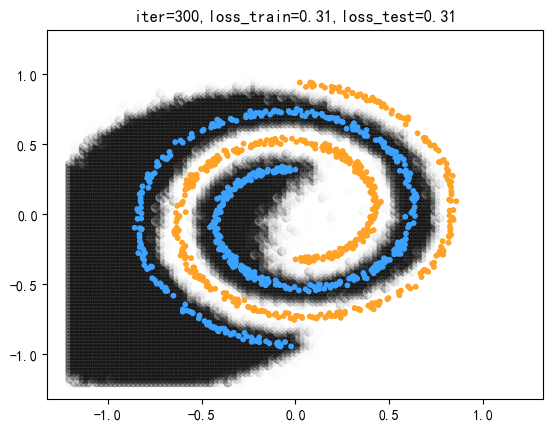

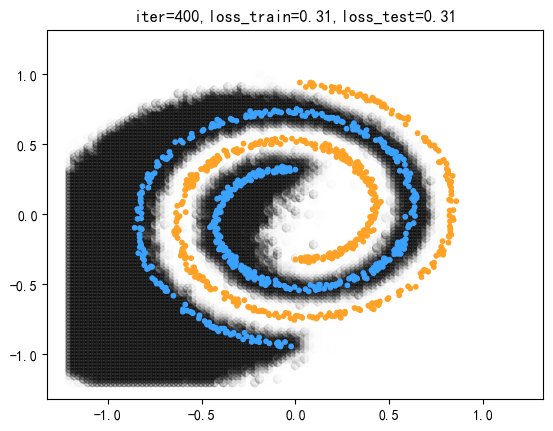

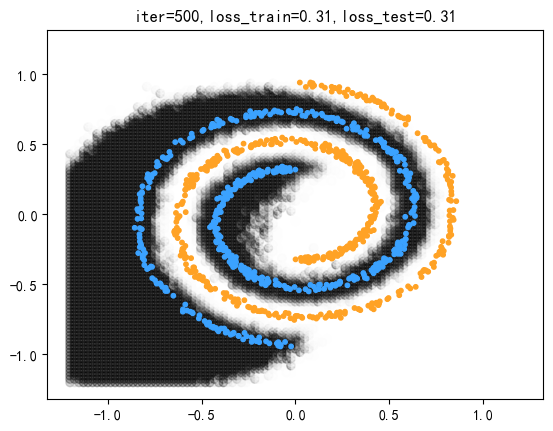

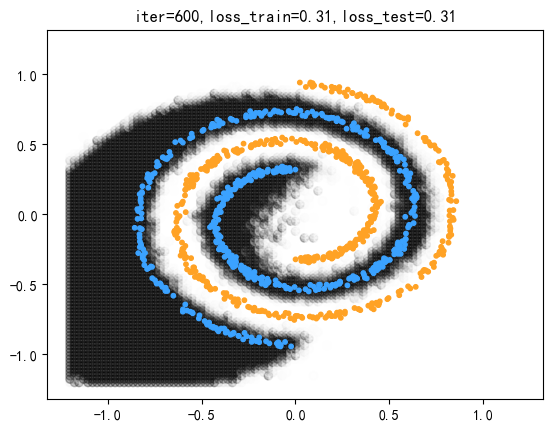

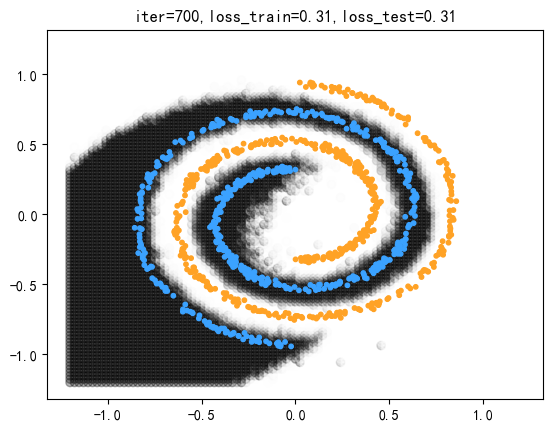

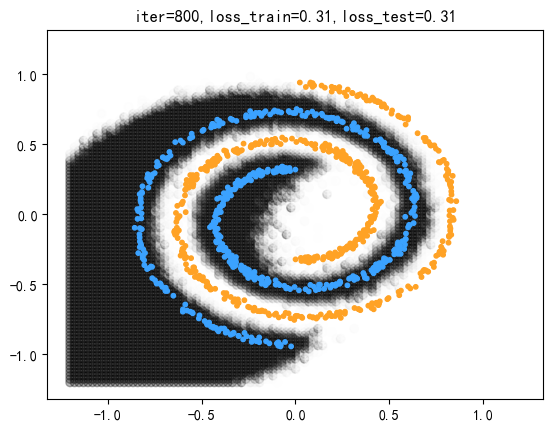

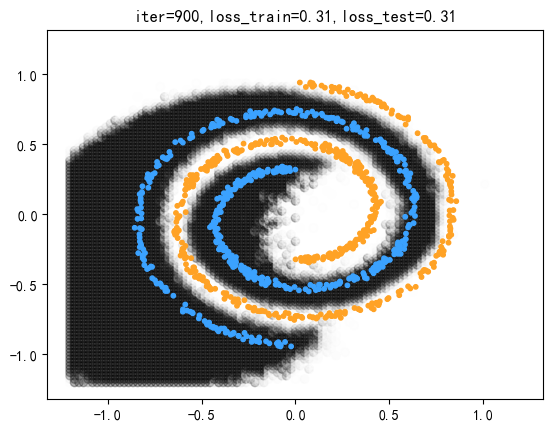

In [134]:
from torch import optim
from sklearn.model_selection import train_test_split
src_x, src_y = lx_data, lx_target
train_x, test_x, train_y, test_y = train_test_split(src_x, src_y, random_state=123, test_size=0.3)

train_x = fill_7(train_x).cuda()
train_y = tensor(train_y, dtype=torch.long).cuda()
test_x = fill_7(test_x).cuda()
test_y = tensor(test_y, dtype=torch.long).cuda()
disp_input_tensor = fill_7(disp_np).cuda()

class MLP_6312(Module):
    def __init__(self):
        super(MLP_6312, self).__init__()
        self.l1 = nn.Linear(7, 60)
        self.l2 = nn.Linear(60, 30)
        self.l3 = nn.Linear(30, 10)
        self.l4 = nn.Linear(10, 2)
    def forward(self, input):
        x = torch.relu(self.l1(input))
        x = F.dropout(torch.relu(self.l2(x)), p=0.2)
        x = F.relu(self.l3(x))
        x = torch.relu(self.l4(x))
        return F.softmax(x, dim=1)

model = MLP_6312().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05, weight_decay=0.0001)
for iter in range(1000):
    train_x_predict = model(train_x)
    loss_train = criterion(train_x_predict, train_y.view(-1))
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    if iter % 100 == 0:
        model.eval()
        loss_test = criterion(model(test_x), test_y)
        disp_predict_tensor = model(disp_input_tensor)
        model.train()
        disp_predict_np = disp_predict_tensor.cpu().detach().numpy()
        plt.title("iter=" + str(iter)
                  + ",loss_train=" + str(loss_train.cpu().detach().numpy())[:4]
                  + ",loss_test=" + str(loss_test.cpu().detach().numpy())[:4])
        plt.scatter(disp_np[:, 0], disp_np[:, 1], cmap='gray', alpha=0.3,
                    c=disp_predict_np[:, 0] - disp_predict_np[:, 1])
        plt.scatter(src_x[:, 0], src_x[:, 1], c=src_y, s=10, cmap=color_arr)
        plt.show()